## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [2]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [3]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,30_a_50,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,1000,2,PROPIA,EDUCACIÓN,N,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,2,ALQUILER,SALUD,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,4,ALQUILER,SALUD,Y,ACTIVO,M,DESCONOCIDO,1.0
3,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,2500,2,PROPIA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,C,C,35000,3,ALQUILER,EDUCACIÓN,N,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


### Revisión de meta-datos

In [4]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil_N
estado_credito_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
personas_a_cargo

Cantidad de filas: 9765


### Armado de los sets de entrenamiento y testeo

In [37]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values
labels_numeric = np.where(labels == 'Y', 1.0, 0.0)

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_civil_N',
       'estado_credito_N', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("Etiquetas transformadas (numéricas):", labels_numeric[:10])
print("Tipo de datos después de la transformación:", labels_numeric.dtype)

print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
Etiquetas transformadas (numéricas): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Tipo de datos después de la transformación: float64
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_civil_N,estado_credito_N,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,30_a_50,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,1000,2,PROPIA,EDUCACIÓN,C,P,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,35000,2,ALQUILER,SALUD,C,C,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,35000,4,ALQUILER,SALUD,C,C,ACTIVO,M,DESCONOCIDO,1.0
3,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,2500,2,PROPIA,INVERSIONES,N,C,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,35000,3,ALQUILER,EDUCACIÓN,C,C,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


In [7]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_2k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,1000,2,3.0,False,True,False,False,False,False,True,...,True,False,False,True,False,False,False,True,False,False
1,35000,2,3.0,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,35000,4,1.0,True,False,False,False,False,False,True,...,True,False,False,True,True,False,False,False,False,False
3,2500,2,4.0,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
4,35000,3,3.0,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [130]:
!pip install seaborn
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 6.6 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 332.3 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.2 MB/s eta 0:00:0000:0100:01


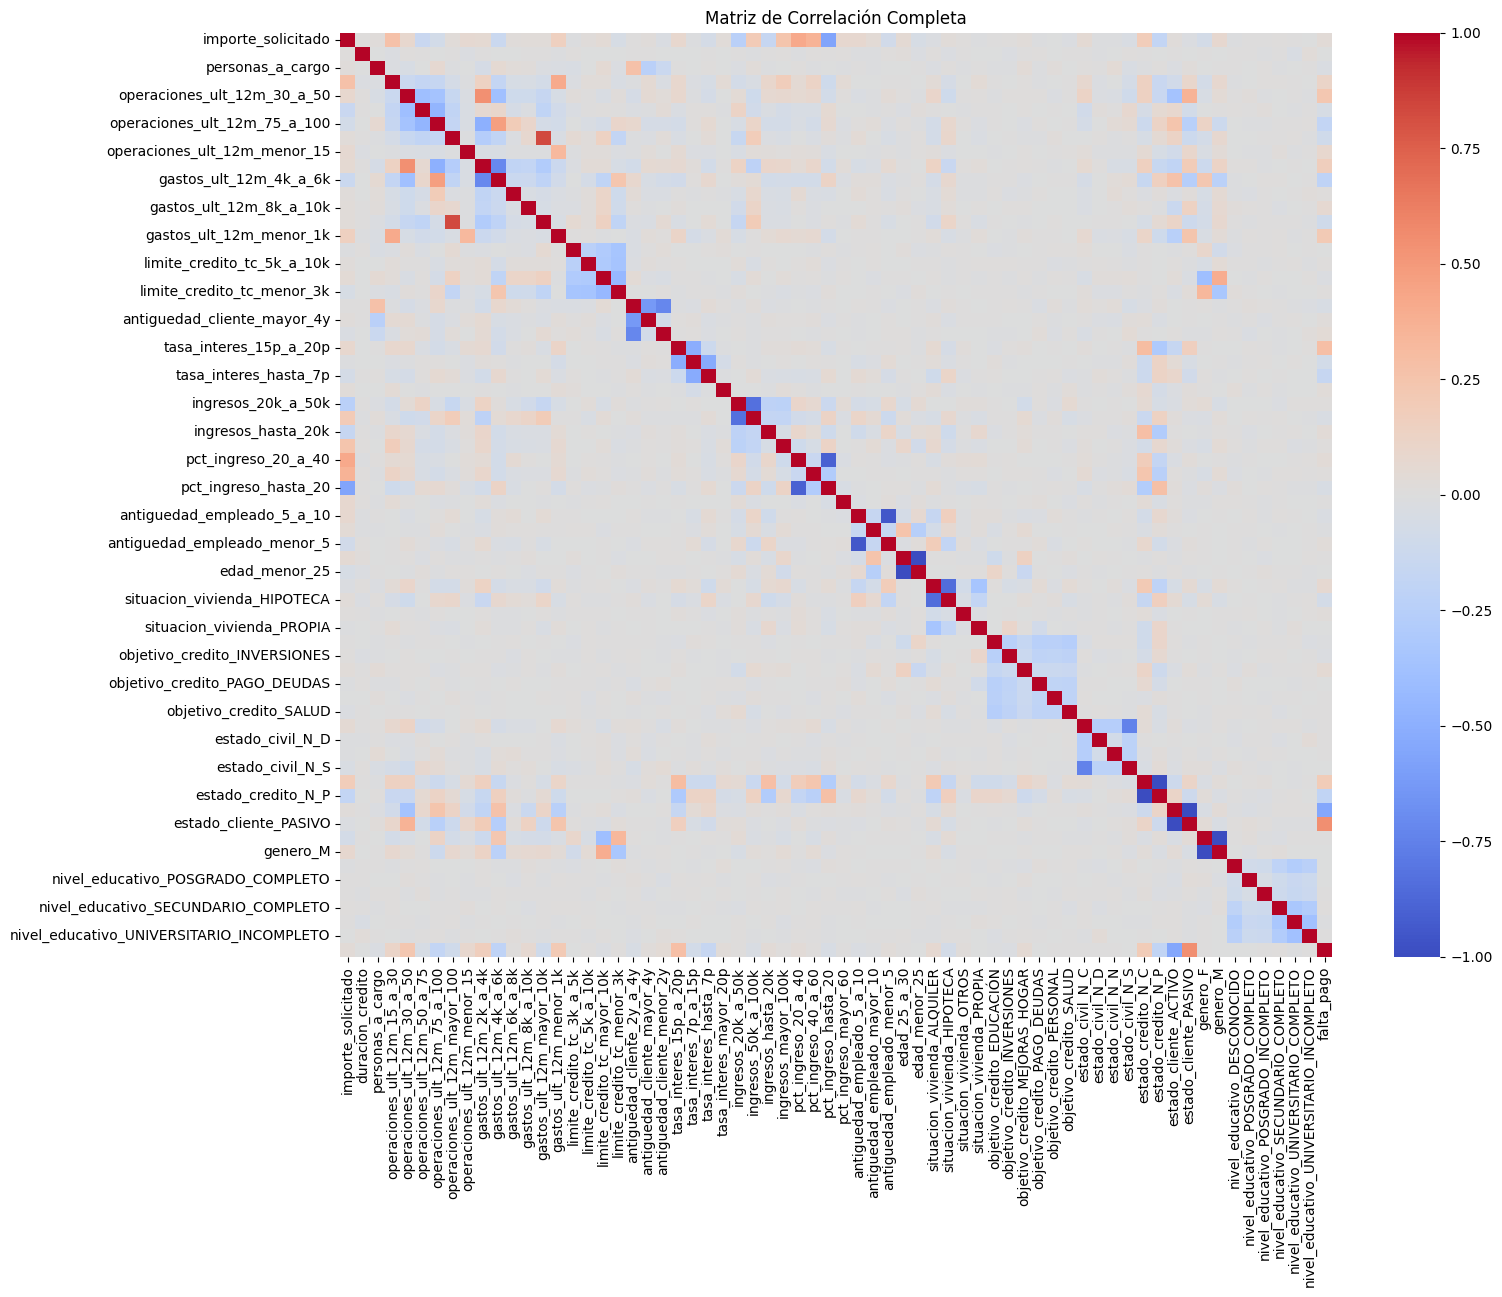


Correlaciones con la Variable Objetivo (falta_pago):
falta_pago                      1.000000
estado_cliente_PASIVO           0.550829
tasa_interes_15p_a_20p          0.284060
operaciones_ult_12m_30_a_50     0.232713
gastos_ult_12m_menor_1k         0.206386
                                  ...   
tasa_interes_hasta_7p          -0.161692
operaciones_ult_12m_75_a_100   -0.180244
estado_credito_N_P             -0.187916
gastos_ult_12m_4k_a_6k         -0.208829
estado_cliente_ACTIVO          -0.550829
Name: falta_pago, Length: 66, dtype: float64

Variables con alta correlación con la variable objetivo:
['falta_pago', 'estado_cliente_PASIVO', 'estado_cliente_ACTIVO']

Variables con baja correlación con la variable objetivo:
['antiguedad_cliente_menor_2y', 'pct_ingreso_20_a_40', 'importe_solicitado', 'ingresos_hasta_20k', 'antiguedad_empleado_menor_5', 'tasa_interes_mayor_20p', 'situacion_vivienda_OTROS', 'antiguedad_cliente_mayor_4y', 'pct_ingreso_40_a_60', 'ingresos_20k_a_50k', 'limite_c

In [9]:
import seaborn as sns

data_model = data.copy()
labels_numeric = pd.Series(labels).map({'Y': 1, 'N': 0})
data_model['falta_pago'] = labels_numeric
correlation_matrix = data_model.corr()

# Visualizar la matriz de correlación completa
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlación Completa")
plt.show()

# Filtrar las correlaciones con la variable objetivo (falta_pago)   
correlation_with_target = correlation_matrix['falta_pago'].sort_values(ascending=False)
print("\nCorrelaciones con la Variable Objetivo (falta_pago):")
print(correlation_with_target)

# Umbral para considerar una correlación alta (positiva o negativa)
umbral_alto = 0.5
umbral_bajo = 0.05

# Variables con alta correlación con la variable objetivo
variables_fuertes = correlation_with_target[correlation_with_target.abs() > umbral_alto].index.tolist()
print(f"\nVariables con alta correlación con la variable objetivo:\n{variables_fuertes}")

# Variables con baja correlación con la variable objetivo
variables_debiles = correlation_with_target[correlation_with_target.abs() < umbral_bajo].index.tolist()
print(f"\nVariables con baja correlación con la variable objetivo:\n{variables_debiles}")





In [10]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [11]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          8000.0
duracion_credito                               2.0
personas_a_cargo                               0.0
operaciones_ult_12m_15_a_30                  False
operaciones_ult_12m_30_a_50                  False
                                             ...  
nivel_educativo_POSGRADO_COMPLETO            False
nivel_educativo_POSGRADO_INCOMPLETO          False
nivel_educativo_SECUNDARIO_COMPLETO          False
nivel_educativo_UNIVERSITARIO_COMPLETO       False
nivel_educativo_UNIVERSITARIO_INCOMPLETO      True
Name: 8540, Length: 65, dtype: object
--------------------------------------------------
Label del registro: 
N

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          1950.0
duracion_credito                               2.0
personas_a_cargo                               3.0
operaciones_ult

In [12]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [13]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

#### ZeroR

In [14]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

DummyClassifier(constant=None, random_state=None, strategy='prior')

In [15]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.821048321048321
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [16]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

2024/11/20 07:06:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/20 07:06:09 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.11.1 <= statsmodels <= 0.14.3, but the installed version is 0.14.4. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2024/11/20 07:06:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


#### Regresión Logística

In [17]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.864045864045864
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.94      0.92      2005
           Y       0.66      0.50      0.57       437

    accuracy                           0.86      2442
   macro avg       0.78      0.72      0.74      2442
weighted avg       0.85      0.86      0.86      2442

Matriz de confusión:


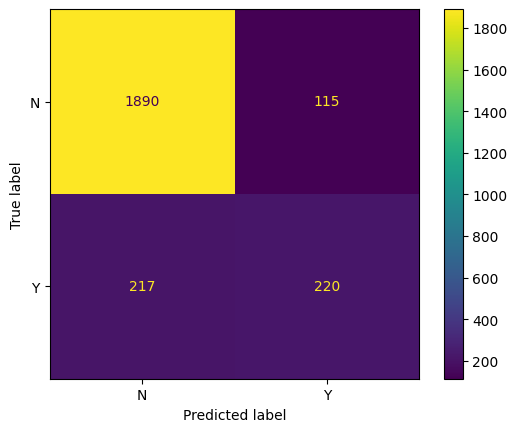

In [18]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.8206388206388207
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.82      1.00      0.90      2005
           Y       0.44      0.01      0.02       437

    accuracy                           0.82      2442
   macro avg       0.63      0.50      0.46      2442
weighted avg       0.75      0.82      0.74      2442

Matriz de confusión:


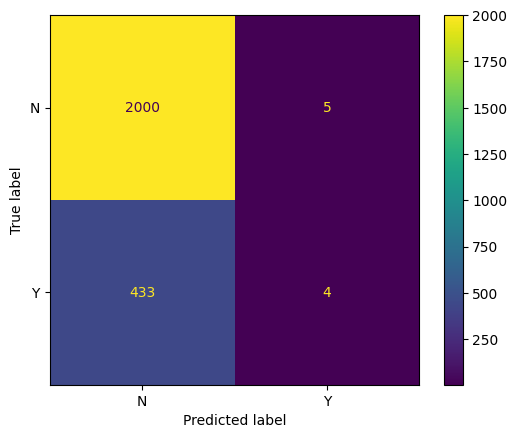

In [20]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [21]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.8755118755118755
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      2005
           Y       0.67      0.60      0.63       437

    accuracy                           0.88      2442
   macro avg       0.79      0.77      0.78      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


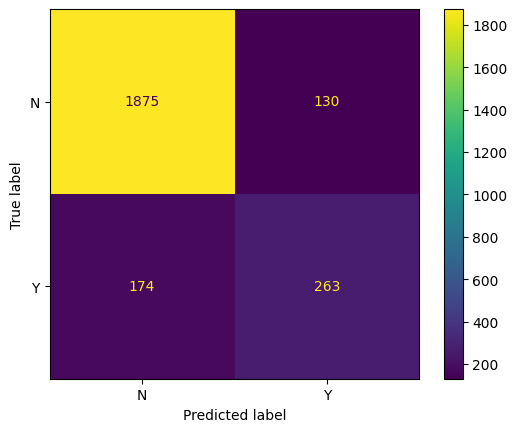

In [22]:
evaluar_modelo(dtc, test_data, test_labels)

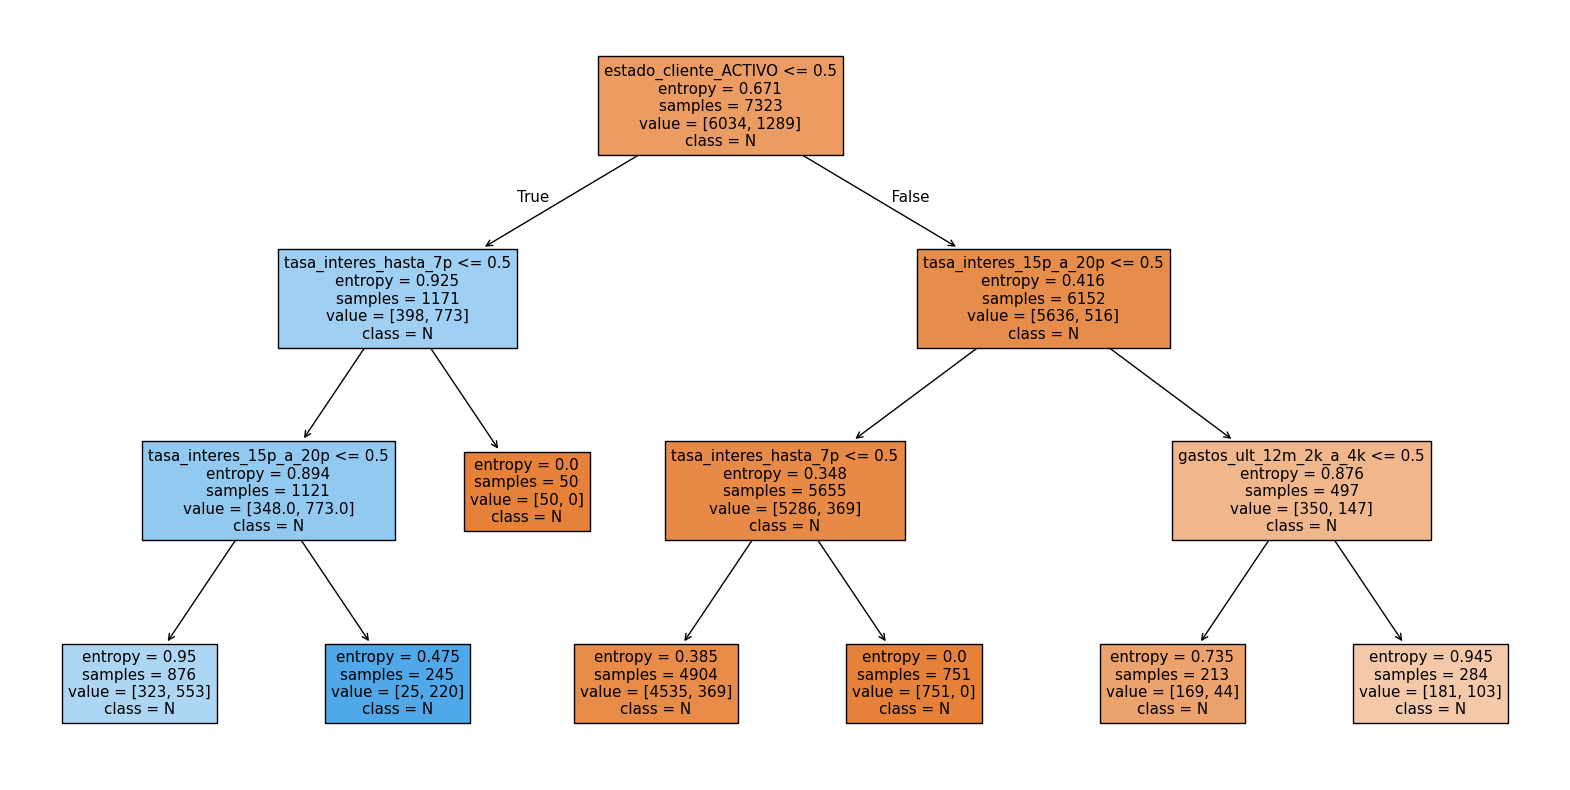

In [23]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

#### Métodos de ensamblado de modelos: RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8726453726453727
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      2005
           Y       0.70      0.50      0.58       437

    accuracy                           0.87      2442
   macro avg       0.80      0.73      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


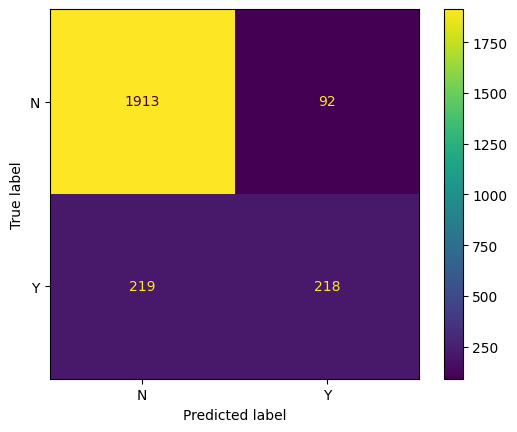

In [25]:
evaluar_modelo(rndf, test_data, test_labels)

----
Prueba #2

In [26]:
mlflow.set_experiment(experiment_name="Prueba #21")


<Experiment: artifact_location='file:///home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/notebooks/modelado/mlruns/915994304008549075', creation_time=1732055277430, experiment_id='915994304008549075', last_update_time=1732055277430, lifecycle_stage='active', name='Prueba #21', tags={}>

In [54]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=15)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8767403767403767
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.96      0.93      2005
           Y       0.74      0.47      0.58       437

    accuracy                           0.88      2442
   macro avg       0.82      0.72      0.75      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


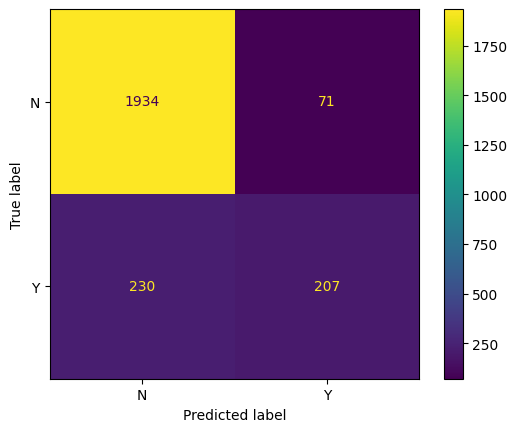

In [55]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

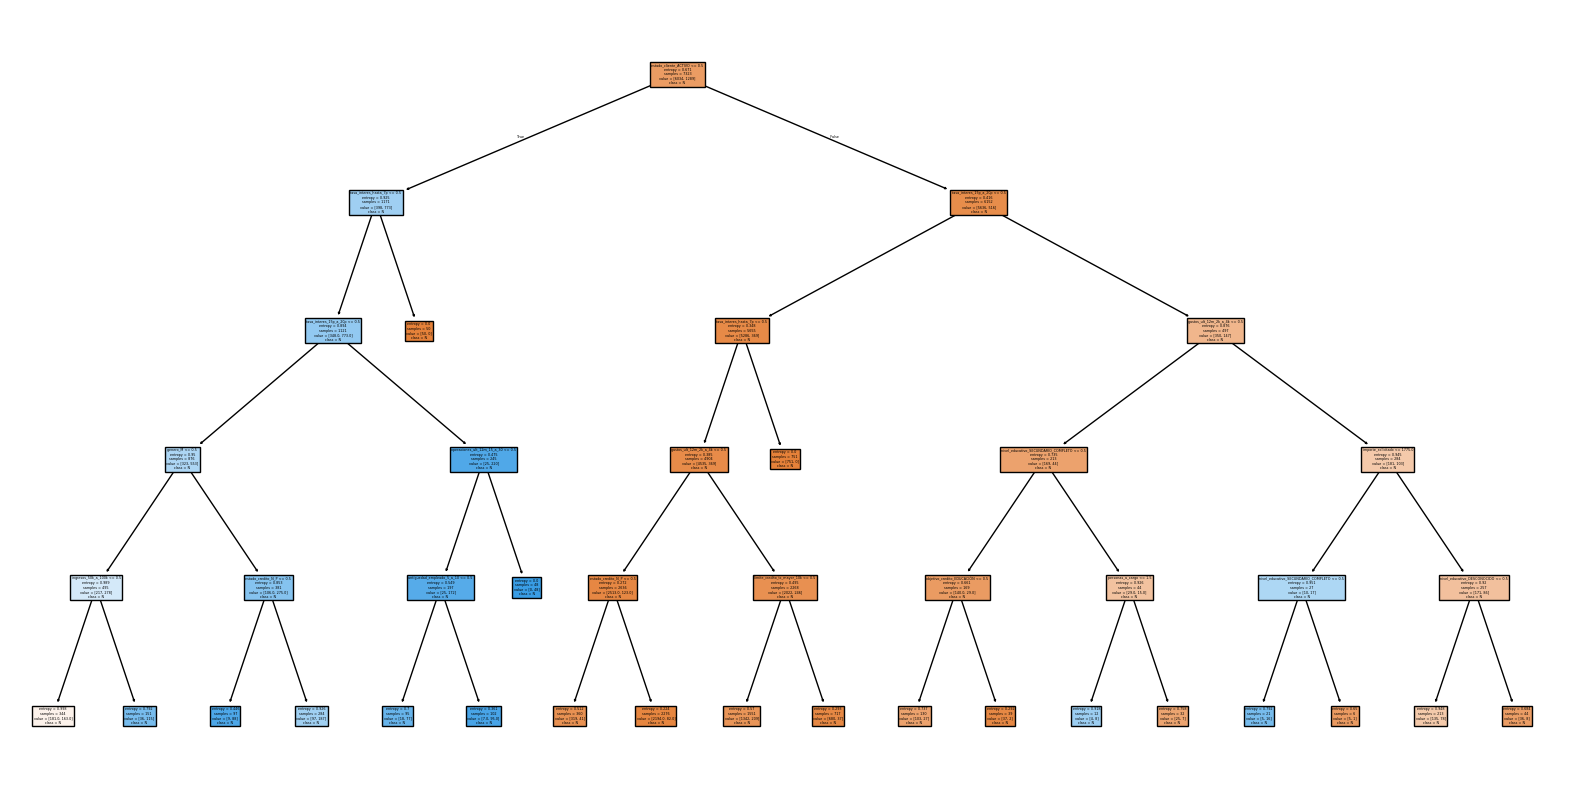

In [56]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

In [57]:

params = {
    'solver': 'liblinear',
    'penalty': 'l2',
    'C': 1.0,
    'max_iter': 100,
    'class_weight': 'balanced'
}


with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(**params)

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8411138411138411
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.94      0.86      0.90      2005
           Y       0.54      0.74      0.62       437

    accuracy                           0.84      2442
   macro avg       0.74      0.80      0.76      2442
weighted avg       0.87      0.84      0.85      2442

Matriz de confusión:


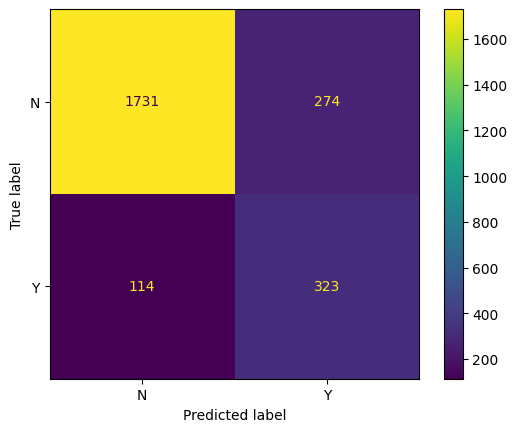

In [58]:
evaluar_modelo(lreg, test_data, test_labels)

In [59]:
params = {
    'n_estimators': 100,          
    'max_depth': 10,              
    'min_samples_split': 5,      
    'min_samples_leaf': 2,        
    'max_features': 'sqrt',       
    'class_weight': 'balanced',   
    'random_state': 42            
}


with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(**params)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8648648648648649
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.93      0.91      0.92      2005
           Y       0.61      0.67      0.64       437

    accuracy                           0.86      2442
   macro avg       0.77      0.79      0.78      2442
weighted avg       0.87      0.86      0.87      2442

Matriz de confusión:


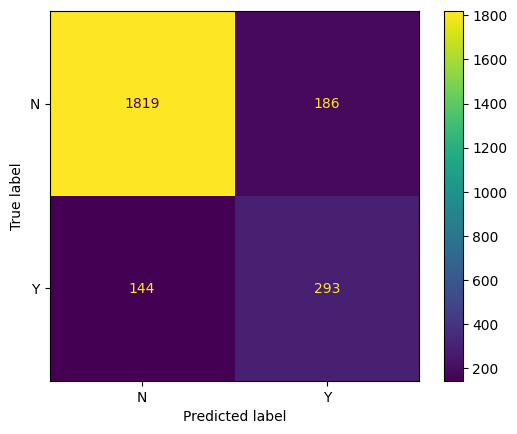

In [60]:
evaluar_modelo(rndf, test_data, test_labels)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': 100,        
    'learning_rate': 0.1,       
    'max_depth': 3,             
    'min_samples_split': 5,     
    'min_samples_leaf': 2,      
    'random_state': 42          
}

with mlflow.start_run(run_name='Gradient Boosting'):
    gbc = GradientBoostingClassifier(**params)
    gbc.fit(train_data, train_labels)
    mlflow.log_params(params)

    # Evaluar el modelo
    predictions = gbc.predict(test_data)


Rendimiento obtenido: 0.8763308763308764
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.93      2005
           Y       0.67      0.60      0.63       437

    accuracy                           0.88      2442
   macro avg       0.79      0.77      0.78      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


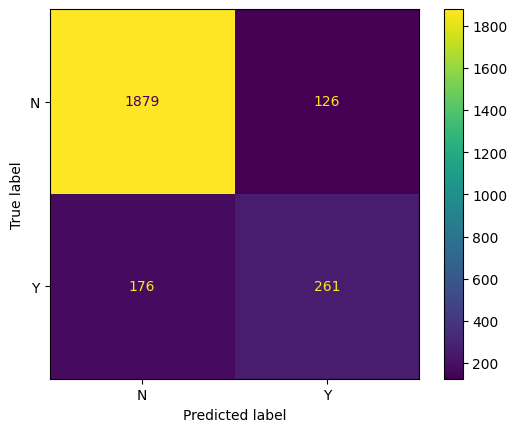

In [67]:
evaluar_modelo(gbc, test_data, test_labels)

### Prueba #3

In [72]:
mlflow.set_experiment(experiment_name="Prueba #3")

2024/11/20 10:24:48 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #3' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/notebooks/modelado/mlruns/399313931578989172', creation_time=1732116288162, experiment_id='399313931578989172', last_update_time=1732116288162, lifecycle_stage='active', name='Prueba #3', tags={}>

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Copia de los datos para evitar modificaciones accidentales
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

# Paso 1: Escalar solo las columnas originales
scaler = StandardScaler()
original_features = [col for col in train_data.columns if col != 'cluster']
train_data_scaled = scaler.fit_transform(train_data_copy[original_features])
test_data_scaled = scaler.transform(test_data_copy[original_features])

# Paso 2: Aplicar clustering en los datos escalados
kmeans = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans.fit_predict(train_data_scaled)
test_clusters = kmeans.predict(test_data_scaled)

# Paso 3: Crear conjuntos de datos consistentes con los clusters como nuevas columnas
train_data_clustered = pd.DataFrame(train_data_scaled, columns=original_features)
train_data_clustered['cluster'] = train_clusters

test_data_clustered = pd.DataFrame(test_data_scaled, columns=original_features)
test_data_clustered['cluster'] = test_clusters


2024/11/20 14:25:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '69779829f5364045ae8ea9750cddb945', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/20 14:25:43 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


### Random Forrest

In [120]:
from sklearn.model_selection import cross_validate, StratifiedKFold


train_labels_numeric = np.where(train_labels == 'Y', 1, 0)
test_labels_numeric = np.where(test_labels == 'Y', 1, 0)

seed = 42


params_rf = {
    'n_estimators': 10          
 }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

with mlflow.start_run(run_name='Random Forest with Clustering'):
    rndf = RandomForestClassifier(**params_rf)   

    cv_results_rf = cross_validate(rndf, train_data_clustered, train_labels_numeric, cv=cv, 
                                   scoring=['accuracy', 'precision', 'recall', 'f1'], 
                                   return_train_score=False)
    
    mlflow.log_params(params_rf)
    mlflow.log_metric("mean_accuracy", np.mean(cv_results_rf['test_accuracy']))
    mlflow.log_metric("mean_precision", np.mean(cv_results_rf['test_precision']))
    mlflow.log_metric("mean_recall", np.mean(cv_results_rf['test_recall']))
    mlflow.log_metric("mean_f1", np.mean(cv_results_rf['test_f1']))

    rndf.fit(train_data_clustered, train_labels_numeric)


    # Guardar el modelo entrenado
    mlflow.sklearn.log_model(rndf, "random_forest_model")


2024/11/20 14:42:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/20 14:42:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jc

2024/11/20 14:42:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Rendimiento obtenido: 0.8751023751023751
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2005
           1       0.71      0.50      0.59       437

    accuracy                           0.88      2442
   macro avg       0.81      0.73      0.76      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


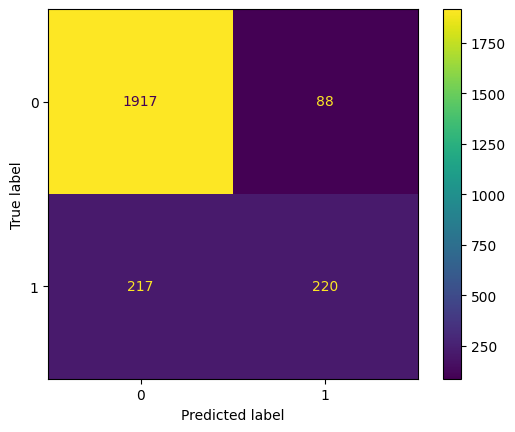

In [121]:
evaluar_modelo(rndf, test_data_clustered, test_labels_numeric)

### Decision Tree

In [146]:
with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=15)

    dtc.fit(train_data_clustered, train_labels_numeric)

2024/11/20 19:48:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/20 19:48:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jc

2024/11/20 19:49:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Rendimiento obtenido: 0.8763308763308764
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2005
           1       0.73      0.49      0.59       437

    accuracy                           0.88      2442
   macro avg       0.81      0.73      0.76      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


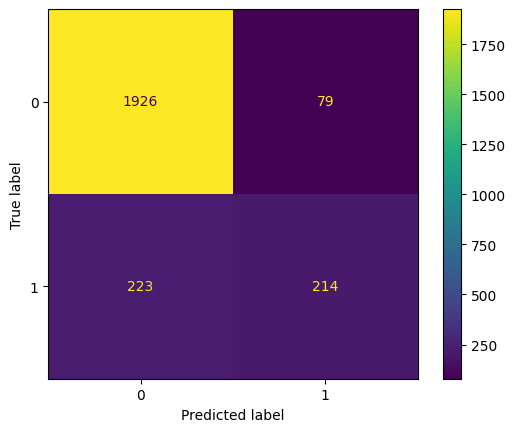

In [147]:
evaluar_modelo(dtc, test_data_clustered, test_labels_numeric)

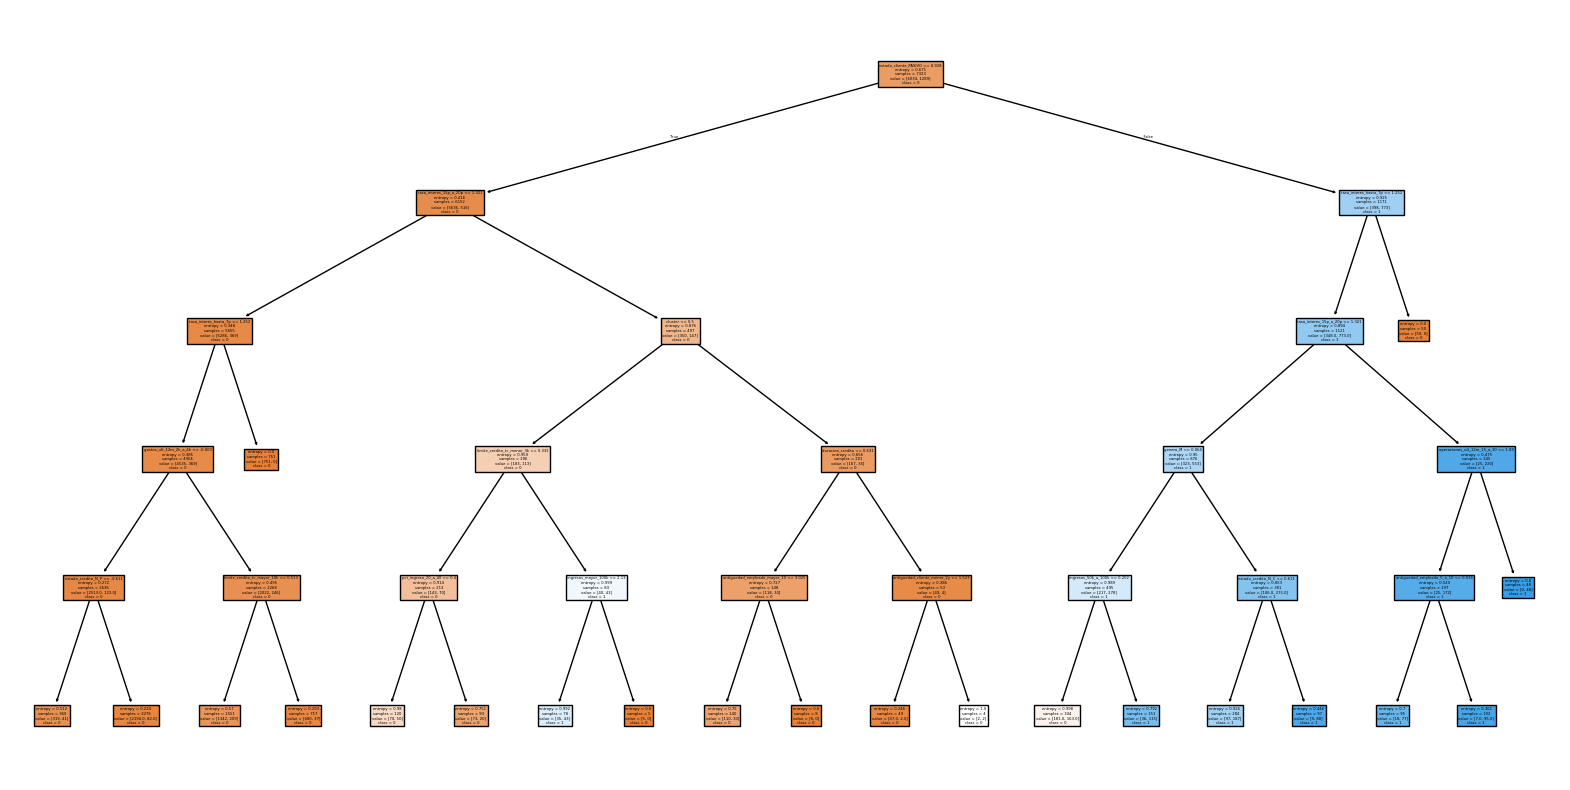

In [151]:
feature_names = train_data_clustered.columns if hasattr(train_data_clustered, 'columns') else None

# Obtén las clases desde el modelo
class_names = [str(cls) for cls in dtc.classes_]  # Convierte las clases a cadenas si no lo son

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


### Linear Regresion

In [150]:
params = {
    'solver': 'liblinear',
    'penalty': 'l2',
    'C': 1.0,
    'max_iter': 100
}


with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(**params)

    lreg.fit(train_data_clustered, train_labels_numeric)

2024/11/20 19:52:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/20 19:52:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jc

2024/11/20 17:41:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Rendimiento obtenido: 0.868959868959869
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      2005
           1       0.66      0.55      0.60       437

    accuracy                           0.87      2442
   macro avg       0.78      0.75      0.76      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


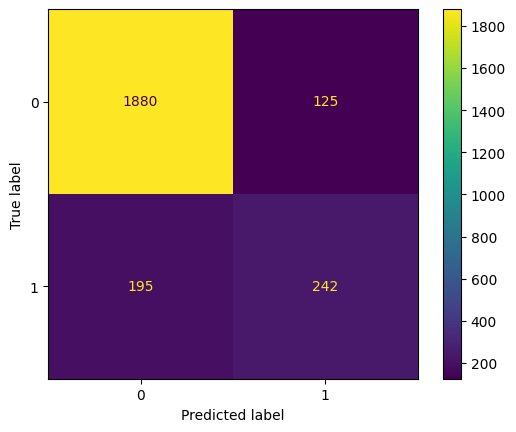

In [129]:
evaluar_modelo(lreg, test_data_clustered, test_labels_numeric)

### Gradient Boosting

In [126]:
params = {
    'n_estimators': 100,        
    'learning_rate': 0.1,       
    'max_depth': 3,             
    'min_samples_split': 5,     
    'min_samples_leaf': 2,      
    'random_state': seed          
}

with mlflow.start_run(run_name='Gradient Boosting'):
    gbc = GradientBoostingClassifier(**params)
    gbc.fit(train_data_clustered, train_labels_numeric)


2024/11/20 17:39:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/20 17:39:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jc

2024/11/20 17:39:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Rendimiento obtenido: 0.8775593775593775
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2005
           1       0.68      0.60      0.64       437

    accuracy                           0.88      2442
   macro avg       0.80      0.77      0.78      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


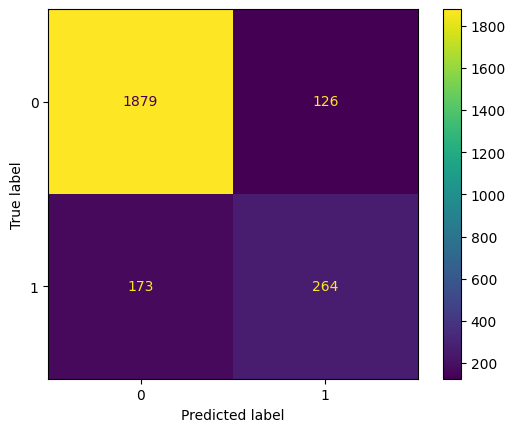

In [127]:
evaluar_modelo(gbc, test_data_clustered, test_labels_numeric)

### Red neuronal Keras

In [140]:
def evaluar_modelo_keras(modelo, test_data, test_labels):
    # Predecir probabilidades
    probabilities = modelo.predict(test_data)
    
    # Convertir probabilidades en clases (0 o 1) usando un umbral de 0.5
    prediction = (probabilities > 0.5).astype(int).flatten()
    
    # Calcular el rendimiento del modelo
    print('Rendimiento obtenido (accuracy):', accuracy_score(test_labels, prediction))
    print('Reporte de indicadores:\n', classification_report(test_labels, prediction))
    
    # Mostrar la matriz de confusión
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=[0, 1])  # Suponemos clasificación binaria
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.show()

In [133]:
# Convertir etiquetas a formato numérico (0 y 1)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)


In [136]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

2024/11/20 18:26:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e55aec17ebcb4f1489d5c4641195f977', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/20 18:26:31 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/20 18:26:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, accuracy_score

# Crear el modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

with mlflow.start_run(run_name='Red Neuronal Clasificación Binaria'):
    # Compilar el modelo
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar el modelo
    history = model.fit(
        train_data, train_labels,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    train_predictions = model.predict(train_data)  # Probabilidades
    train_predictions_binary = (train_predictions > 0.5).astype(int).flatten()  # Clases binarias

    # Calcular métricas
    training_score = model.evaluate(train_data, train_labels, verbose=0)[1]  # Accuracy desde el modelo
    training_precision_score = precision_score(train_labels, train_predictions_binary)
    training_accuracy_score = accuracy_score(train_labels, train_predictions_binary)

    # Registrar métricas en MLflow
    mlflow.log_metric("training_score", training_score)
    mlflow.log_metric("training_precision_score", training_precision_score)
    mlflow.log_metric("training_accuracy_score", training_accuracy_score)

    # Registrar el modelo en MLflow
    mlflow.keras.log_model(model, "Red_Neuronal")




/home/jcsolis/viu/gestionProyectosBD/13MBID-Viu-A-2425/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8144 - loss: 0.4525

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8154 - loss: 0.4503 - val_accuracy: 0.8621 - val_loss: 0.3515
Epoch 2/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8736 - loss: 0.3069

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8737 - loss: 0.3067 - val_accuracy: 0.8717 - val_loss: 0.3461
Epoch 3/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8748 - loss: 0.2937

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.2935 - val_accuracy: 0.8683 - val_loss: 0.3363
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8929 - loss: 0.2661 - val_accuracy: 0.8655 - val_loss: 0.3384
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8860 - loss: 0.2800 - val_accuracy: 0.8696 - val_loss: 0.3476
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9005 - loss: 0.2436 - val_accuracy: 0.8669 - val_loss: 0.3412
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9032 - loss: 0.2381 - val_accuracy: 0.8676 - val_loss: 0.3431
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.2330 - val_accuracy: 0.8635 - val_loss: 0.3590
Epoch 9/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.2383 - val_accuracy: 0.8676 - val_loss: 0.3500
Epoch 10/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9076 - loss: 0.2297 - val_accuracy: 0.8635 - val

2024/11/20 19:17:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/11/20 19:17:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rendimiento obtenido (accuracy): 0.8411138411138411
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      2005
           1       0.56      0.50      0.53       437

    accuracy                           0.84      2442
   macro avg       0.73      0.71      0.72      2442
weighted avg       0.83      0.84      0.84      2442

Matriz de confusión:


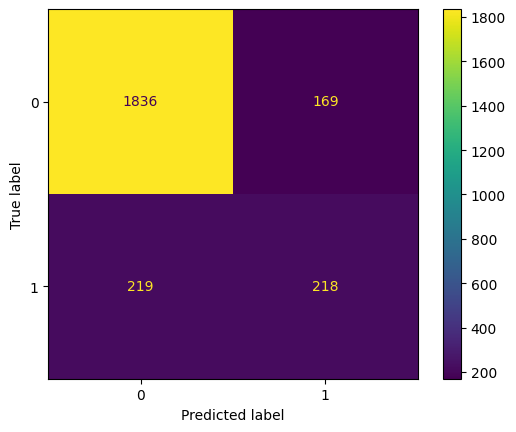

In [143]:
evaluar_modelo_keras(model, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas 
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los clientes.
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

----

### Prueba de despliegue (utilzando datos nuevos)

In [1]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

NameError: name 'pd' is not defined

**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [ ]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# Antiguedad del empleado

etiquetas_a_e = ['menor_10', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

# tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

In [ ]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

In [ ]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

In [ ]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

In [ ]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = dtc.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

In [ ]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()